In [30]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [31]:
# import dataset

df = pd.read_csv('../data-cleaning/dataset/combineddata.csv')

In [32]:
df.head()

,powder,salt,oil,edible,vegetable,wheat,flour,sugar,chilli,red,...,tocopheryl,triethanolamine,cl,titanium,dioxide,root,stearate,orange,honey,TYPE
0,1,1,1,1,1,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [33]:
# function for row sampling

def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)
     

In [40]:
# function for feature sampling

import random

def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['TYPE']
  return new_df

In [35]:
# function for combined sampling

def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

In [42]:
df1 = combined_sampling(df,0.5)

C:\Users\HP\AppData\Local\Temp\ipykernel_13732\1281944545.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['TYPE']


In [43]:
df1.shape

(93, 57)

In [44]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()

In [45]:
clf1.fit(df1.iloc[:,0:115],df1.iloc[:,-1])

DecisionTreeClassifier()

In [46]:
from sklearn.tree import plot_tree

[Text(0.5, 0.75, 'x[56] <= 0.5\ngini = 0.483\nsamples = 93\nvalue = [38, 55]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 38\nvalue = [38, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 55\nvalue = [0, 55]')]

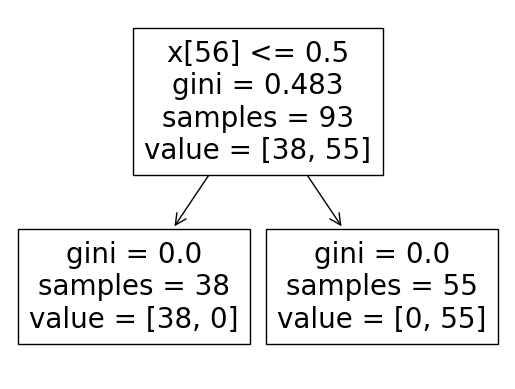

In [48]:
plot_tree(clf1)